## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pathlib import Path

## Configurações

In [2]:
data_path = Path(r'..\..\01_dados\02_dados_agregados')
plot_path = Path(r'..\..\05_plots')
save_data_path = Path(r'..\..\01_dados\03_dados_modelagem')

warnings.filterwarnings('ignore')

## Funções e Classes auxiliares

In [3]:
def aggregate_and_analyze(df_aux):
    df = df_aux.copy()
    df['din_instante'] = pd.to_datetime(df['din_instante'])
    df.set_index('din_instante', inplace=True)

    # Resampling to daily and calculating mean, median, std_dev
    daily_avg = df['cmo'].resample('D').mean()
    mean = daily_avg.mean()
    median = daily_avg.median()
    std_dev = daily_avg.std()

    return daily_avg, mean, median, std_dev

def calcular_estatisticas(df):
    # Remover a coluna 'din_instante' antes de calcular as estatísticas
    df = df.drop(columns='din_instante', errors='ignore')
    
    # Selecionar apenas colunas numéricas
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Calcular média, mediana, máximo e mínimo para cada coluna numérica
    estatisticas = pd.DataFrame({
        'media': df_numeric.mean(),
        'mediana': df_numeric.median(),
        'maximo': df_numeric.max(numeric_only=True),  # Garante que apenas dados numéricos sejam considerados
        'minimo': df_numeric.min(numeric_only=True)   # Garante que apenas dados numéricos sejam considerados
    })
    
    # Calcular a amplitude (diferença entre o máximo e o mínimo)
    estatisticas['amplitude'] = estatisticas['maximo'] - estatisticas['minimo']
    return estatisticas

def validar_amplitudes_iguais(df_n, df_ne, df_s):
    amplitude_iguais = True
    
    # Remover a coluna 'din_instante' de cada DataFrame
    df_n = df_n.drop(columns='din_instante', errors='ignore')
    df_ne = df_ne.drop(columns='din_instante', errors='ignore')
    df_s = df_s.drop(columns='din_instante', errors='ignore')

    # Calcula as estatísticas para cada DataFrame
    estatisticas_n = calcular_estatisticas(df_n)
    estatisticas_ne = calcular_estatisticas(df_ne)
    estatisticas_s = calcular_estatisticas(df_s)

    # Itera pelas colunas para verificar se as amplitudes são iguais
    for coluna in estatisticas_n.index:
        amplitude_n = estatisticas_n.loc[coluna, 'amplitude']
        amplitude_ne = estatisticas_ne.loc[coluna, 'amplitude']
        amplitude_s = estatisticas_s.loc[coluna, 'amplitude']

        # Verifica se as amplitudes são diferentes
        if not (amplitude_n == amplitude_ne == amplitude_s):
            print(f"A coluna {coluna} tem amplitudes diferentes nos sistemas Norte, Nordeste e Sul.")
            amplitude_iguais = False
            
    if amplitude_iguais:
        print('todas as amplitudes entre os três dataframes são iguais')

## Importação dos dados

In [4]:
df_s = pd.read_csv(data_path / 'dados_sul.csv')
df_se = pd.read_csv(data_path / 'dados_sudeste.csv')
df_n = pd.read_csv(data_path / 'dados_norte.csv')
df_ne = pd.read_csv(data_path / 'dados_nordeste.csv')

# Lista dos dataframes para fazer os tratamentos em loops
df_list = [df_s, df_se, df_n, df_ne]

## Preparação dos dados

No último notebook foi possível identificar lacunas nos valores de cmo, eles serão mostrados aqui e preenchidos com a técnica de interpolação linear.

In [5]:
for data in df_list:
    data.sort_values(by='din_instante', inplace=True)

In [6]:
# Applying the function to each region's dataframe
daily_avg_s, mean_s, median_s, std_dev_s = aggregate_and_analyze(df_s)
daily_avg_se, mean_se, median_se, std_dev_se = aggregate_and_analyze(df_se)
daily_avg_n, mean_n, median_n, std_dev_n = aggregate_and_analyze(df_n)
daily_avg_ne, mean_ne, median_ne, std_dev_ne = aggregate_and_analyze(df_ne)

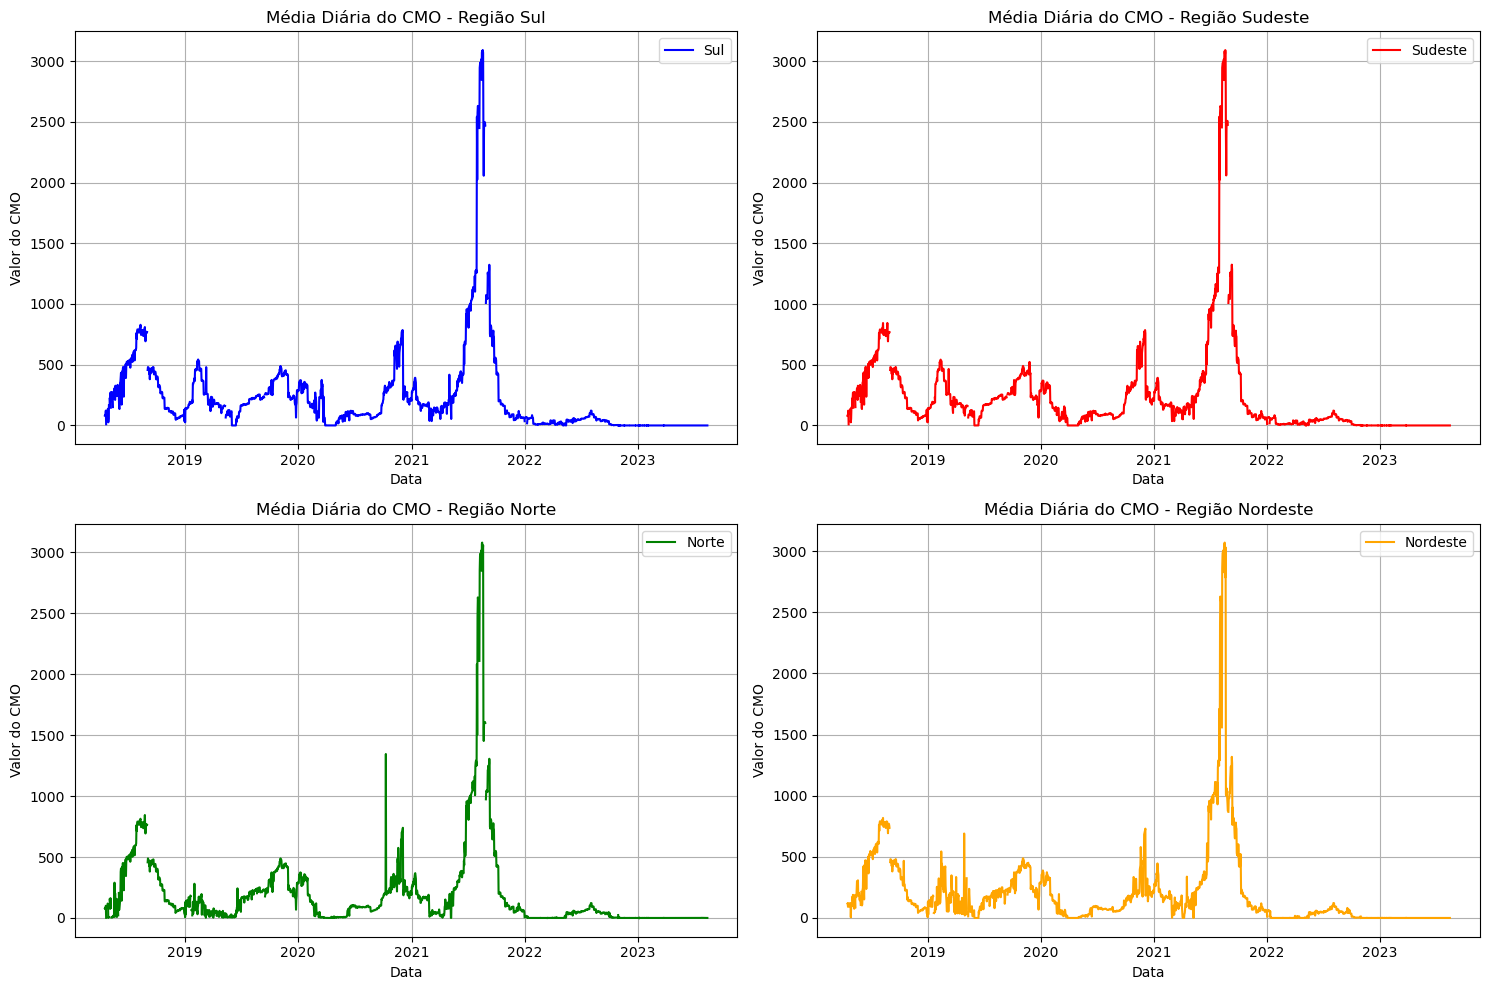

In [7]:
# Plotando as médias diárias para cada região em uma grade 2x2 para uma comparação mais clara

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sul
axes[0, 0].plot(daily_avg_s, label='Sul', color='blue')
axes[0, 0].set_title('Média Diária do CMO - Região Sul')
axes[0, 0].set_xlabel('Data')
axes[0, 0].set_ylabel('Valor do CMO')
axes[0, 0].grid(True)
axes[0, 0].legend()

# Sudeste
axes[0, 1].plot(daily_avg_se, label='Sudeste', color='red')
axes[0, 1].set_title('Média Diária do CMO - Região Sudeste')
axes[0, 1].set_xlabel('Data')
axes[0, 1].set_ylabel('Valor do CMO')
axes[0, 1].grid(True)
axes[0, 1].legend()

# Norte
axes[1, 0].plot(daily_avg_n, label='Norte', color='green')
axes[1, 0].set_title('Média Diária do CMO - Região Norte')
axes[1, 0].set_xlabel('Data')
axes[1, 0].set_ylabel('Valor do CMO')
axes[1, 0].grid(True)
axes[1, 0].legend()

# Nordeste
axes[1, 1].plot(daily_avg_ne, label='Nordeste', color='orange')
axes[1, 1].set_title('Média Diária do CMO - Região Nordeste')
axes[1, 1].set_xlabel('Data')
axes[1, 1].set_ylabel('Valor do CMO')
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout()

In [8]:
df_s['cmo'] = df_s['cmo'].interpolate(method='linear')
df_se['cmo'] = df_se['cmo'].interpolate(method='linear')
df_n['cmo'] = df_n['cmo'].interpolate(method='linear')
df_ne['cmo'] = df_ne['cmo'].interpolate(method='linear')

In [9]:
# Applying the function to each region's dataframe
daily_avg_s, mean_s, median_s, std_dev_s = aggregate_and_analyze(df_s)
daily_avg_se, mean_se, median_se, std_dev_se = aggregate_and_analyze(df_se)
daily_avg_n, mean_n, median_n, std_dev_n = aggregate_and_analyze(df_n)
daily_avg_ne, mean_ne, median_ne, std_dev_ne = aggregate_and_analyze(df_ne)

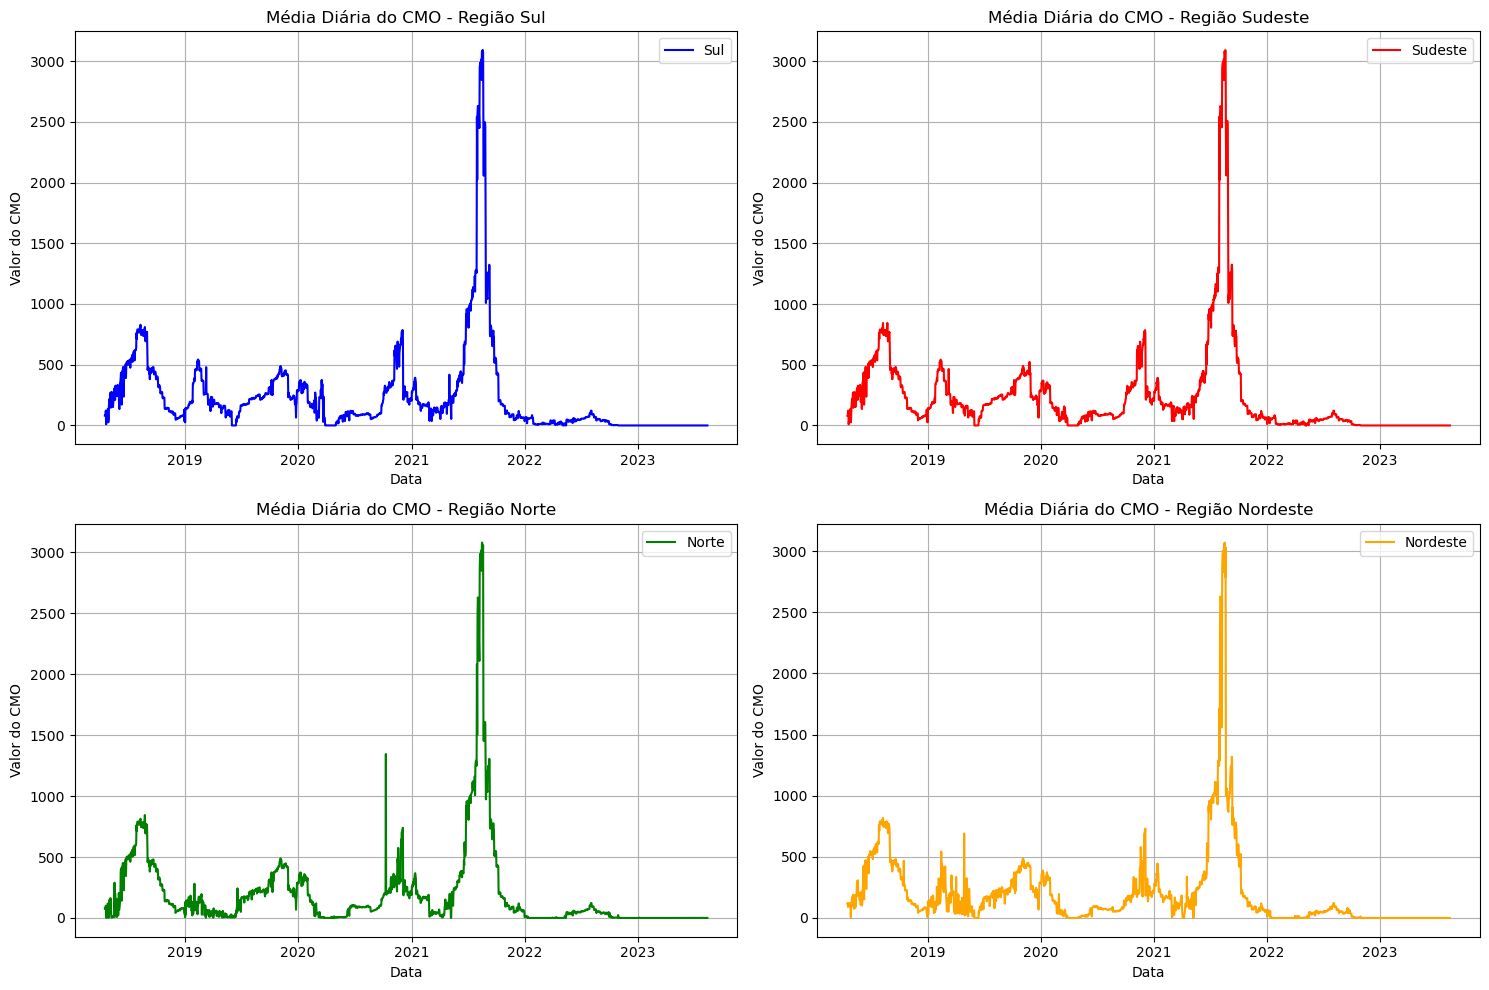

In [10]:
# Plotando as médias diárias para cada região em uma grade 2x2 para uma comparação mais clara

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sul
axes[0, 0].plot(daily_avg_s, label='Sul', color='blue')
axes[0, 0].set_title('Média Diária do CMO - Região Sul')
axes[0, 0].set_xlabel('Data')
axes[0, 0].set_ylabel('Valor do CMO')
axes[0, 0].grid(True)
axes[0, 0].legend()

# Sudeste
axes[0, 1].plot(daily_avg_se, label='Sudeste', color='red')
axes[0, 1].set_title('Média Diária do CMO - Região Sudeste')
axes[0, 1].set_xlabel('Data')
axes[0, 1].set_ylabel('Valor do CMO')
axes[0, 1].grid(True)
axes[0, 1].legend()

# Norte
axes[1, 0].plot(daily_avg_n, label='Norte', color='green')
axes[1, 0].set_title('Média Diária do CMO - Região Norte')
axes[1, 0].set_xlabel('Data')
axes[1, 0].set_ylabel('Valor do CMO')
axes[1, 0].grid(True)
axes[1, 0].legend()

# Nordeste
axes[1, 1].plot(daily_avg_ne, label='Nordeste', color='orange')
axes[1, 1].set_title('Média Diária do CMO - Região Nordeste')
axes[1, 1].set_xlabel('Data')
axes[1, 1].set_ylabel('Valor do CMO')
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout()

#### Medidas Centrais

In [11]:
# Imprimindo as medidas centrais para comparação
print("Sul - Média:", mean_s, "Mediana:", median_s, "Desvio Padrão:", std_dev_s)
print("Sudeste - Média:", mean_se, "Mediana:", median_se, "Desvio Padrão:", std_dev_se)
print("Norte - Média:", mean_n, "Mediana:", median_n, "Desvio Padrão:", std_dev_n)
print("Nordeste - Média:", mean_ne, "Mediana:", median_ne, "Desvio Padrão:", std_dev_ne)

Sul - Média: 232.87075919621446 Mediana: 119.1184375 Desvio Padrão: 380.3414629626303
Sudeste - Média: 230.8404812221651 Mediana: 116.16489583333333 Desvio Padrão: 381.25966733775186
Norte - Média: 195.82936440133608 Mediana: 77.53625 Desvio Padrão: 359.26650980751276
Nordeste - Média: 199.31531009121272 Mediana: 91.44010416666667 Desvio Padrão: 342.55673597514914


As medidas centrais de CMO são as mesmas para Sul, Norte e Nordeste. As Medidas Centrais para Sudeste variam muito pouco.

Vamos investigar mais um pouco a melhor forma de executar as análises.

In [12]:
df_s

,din_instante,cmo,"Geração no Centro de Gravidade - MW médios (Gp,j) - MWh","Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)","Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*","Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)","Garantia física modulada ajustada pelo fator de disponibilidade (GFIS_2p,j)","Garantia Física de Repasse de Risco Hidrológico Modulada e Ajustada (GFIS_2_RRHp,j) - MWh","Garantis Física Modulada Ajustada de Repasse do Risco Hidrológico (GFIS_3_RRHp,j) - MWh","Fator de Risco Hidrológico aceito pelo gerador, variando entre 0 e 11% (Fp,j)",...,val_verifunitcommitment,val_verifconstrainedoff,val_importacaoprogramada,val_importacaodespachada,val_importacaoverificada,val_preco_importacao,val_dispf,val_indisppf,val_indispff,val_intercambiomwmed
0,2018-04-17,80.139375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2018-04-18,84.195417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2018-04-19,84.042708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2018-04-20,122.363750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2018-04-21,9.667292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,2023-08-10,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1942,2023-08-11,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,2023-08-12,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1944,2023-08-13,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
estatisticas_s = calcular_estatisticas(df_s)
estatisticas_se = calcular_estatisticas(df_se)
estatisticas_n = calcular_estatisticas(df_n)
estatisticas_ne = calcular_estatisticas(df_ne)

In [14]:
# Combinar as amplitudes de cada DataFrame em um único DataFrame para comparação
amplitudes = pd.DataFrame({
    'amplitude_s': estatisticas_s['amplitude'],
    'amplitude_se': estatisticas_se['amplitude'],
    'amplitude_n': estatisticas_n['amplitude'],
    'amplitude_ne': estatisticas_ne['amplitude']
})

# Calcular a soma das amplitudes para cada coluna
amplitudes['soma_amplitude'] = amplitudes.sum(axis=1)

# Obter as 10 colunas com a maior soma de amplitudes, excluindo 'din_instante'
colunas_top = amplitudes.nlargest(10, 'soma_amplitude')

colunas_top

,amplitude_s,amplitude_se,amplitude_n,amplitude_ne,soma_amplitude
val_vazaovertida_y,57670.000000,106763.333333,53568.583333,11516.208333,229518.125000
val_vazaoturbinada_y,18008.125000,99923.651667,30748.708333,9623.416667,158303.901667
val_energiavertida,38685.650003,32022.885733,58202.815689,6004.835235,134916.186661
val_vazaovertidaturbinavel,10235.500000,64959.166667,20328.333333,7119.958333,102642.958333
val_preco_importacao,23313.460000,23313.460000,23313.460000,23313.460000,93253.840000
"Garantia física modulada ajustada pelo fator de disponibilidade (GFIS_2p,j)",11477.675383,45944.572131,15920.787455,8350.650197,81693.685165
"Garantia Física de Repasse de Risco Hidrológico Modulada e Ajustada (GFIS_2_RRHp,j) - MWh",9626.985861,38935.742561,11682.126070,7072.881358,67317.735850
"Geração no Centro de Gravidade - MW médios (Gp,j) - MWh",13094.050766,31032.028682,14626.421721,7458.656789,66211.157959
val_intercambio,15788.777496,18080.383792,15825.103958,16456.849292,66151.114538
val_gerhidraulica,14088.212543,25462.853917,16898.650786,6501.630375,62951.347621


Aqui fica evitente que os subsistemas Sul, Norte e Nordeste compartilhamdos mesmos valores e o Subsistema Sudeste aparente ser independente, vamos validar isso

### Salvando os dataframes com o CMO preenchido com interpolação linear

In [17]:
df_s.to_csv(save_data_path / 'dados_sul.csv', index=False)
df_n.to_csv(save_data_path / 'dados_norte.csv', index=False)
df_se.to_csv(save_data_path / 'dados_sudeste.csv', index=False)
df_ne.to_csv(save_data_path / 'dados_nordeste.csv', index=False)